### Tutorial on Non Convex optimization

### Introduction

#### Convex optimization is a subfield of mathematical optimization that deals with minimizing specific convex function over convex sets. The convergence time for the CO is in polynomial. It is interesting since in many cases, convergence time is polynomial. Linear programming (LP) and least square problem (LSP) are special cases of CO. 

#### WhileA NCO is any problem where the objective or any of the constraints are non-convex. Even simple looking problems with as few as ten variables can be extremely challenging, while problems with a few hundreds of variables can be intractable.

#### NCO is one of the popular topics among researchers. As most of the real world problems are NCO.  Researchers generally face the obligation to compromise, i.e. give up seeking the optimal solution, which minimizes the objective over all feasible points. These compromise leads to local optimization where instead of going for the best solution in exponenial time, they choose to go with good solution in polynomial time. 

####  NCO becomes interesting after the blooming of deep learning(DL). As the beauty of DL lies in the approximation capablities for all the funtions existed so far. 

convex function


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


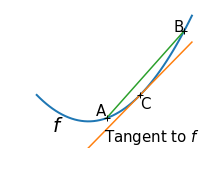

Non convex function


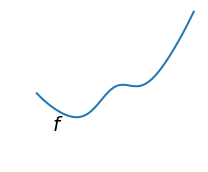

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 2)

plt.figure(1, figsize=(3, 2.5))
plt.clf()

print("convex function")
# A convex function
plt.plot(x, x**2, linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

# The tangent in one point
plt.plot(x, 2*x - 1)
plt.plot(1, 1, 'k+')
plt.text(.3, -.75, "Tangent to $f$", size=15)
plt.text(1, 1 - .5, 'C', size=15)

# Convexity as barycenter
plt.plot([.35, 1.85], [.35**2, 1.85**2])
plt.plot([.35, 1.85], [.35**2, 1.85**2], 'k+')
plt.text(.35 - .2, .35**2 + .1, 'A', size=15)
plt.text(1.85 - .2, 1.85**2, 'B', size=15)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()
plt.show()

print("Non convex function")
# Convexity as barycenter
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()
plt.show()

smooth function


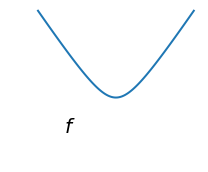

non-smooth function


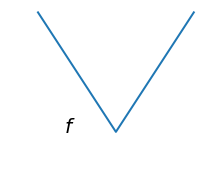

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 101)
print("smooth function")
# A smooth function
plt.figure(1, figsize=(3, 2.5))
plt.clf()

plt.plot(x, np.sqrt(.2 + x**2), linewidth=2)
plt.text(-1, 0, '$f$', size=20)

plt.ylim(ymin=-.2)
plt.axis('off')
plt.tight_layout()
plt.show()
print("non-smooth function")
# A non-smooth function
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, np.abs(x), linewidth=2)
plt.text(-1, 0, '$f$', size=20)

plt.ylim(ymin=-.2)
plt.axis('off')
plt.tight_layout()
plt.show()

### Why non-convex functions are harder

#### Such optimization problems may have multiple feasible and very flat regions, a widely varying curvature, several saddle points, and multiple local minima within each region.
#### It can take exponential amount of time with respect to variables and constraints, to determine the infeasiblity of the solution. 
#### The optimization may also require an initial guess, which is critical and can greatly affect the objective value of the local solution obtained.
####  local optimization methods are often sensitive to algorithm parameter values. May need to change with respect to problems. 
#### Consequently, there cannot be a general algorithm to solve efficiently NCO problems in all cases and scenarios.

Himmelblau's function
[link to the problem](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

$f(x,y)= (x^2+y-11)^2 + (x+y^2-7)^2$

In [5]:
from scipy import optimize as so
import numpy as np
import math

In [6]:
def himm(x):
    return(x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
x=[-2,2] # defining the initial guess for the variable
res = so.minimize(himm,x,method='powell')
print(res)



   direc: array([[ 5.72735706e-05, -2.43997936e-06],
       [ 1.13002658e-13,  3.45654913e-12]])
     fun: 7.888609052210118e-31
 message: 'Optimization terminated successfully.'
    nfev: 136
     nit: 5
  status: 0
 success: True
       x: array([-2.80511809,  3.13131252])


In [7]:
x=[-3,-1] # defining the initial guess for the variable
res = so.minimize(himm,x,method='powell')
print(res)

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-2.89469459e-03, -9.04661314e-04]])
     fun: 4.446415005037821e-22
 message: 'Optimization terminated successfully.'
    nfev: 152
     nit: 6
  status: 0
 success: True
       x: array([-3.77931025, -3.28318599])


In [8]:
x=[0,2] # defining the initial guess for the variable
res = so.minimize(himm,x,method='powell')
print(res)

   direc: array([[-1.70734284e-03,  1.01635333e-03],
       [-9.78812129e-15, -2.23516126e-12]])
     fun: 2.9187853493177437e-29
 message: 'Optimization terminated successfully.'
    nfev: 162
     nit: 5
  status: 0
 success: True
       x: array([3., 2.])


#### As you can see for different intial values we have different optimal value. Lets plot its graph and see what it is 

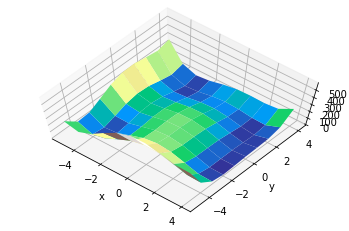

In [9]:
#  plotting our objective function 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-5, 5)
y = np.arange(-5, 5)
xgrid, ygrid = np.meshgrid(x, y) #it is to create a rectangular grid out of the values for x and Y
xy = np.stack([xgrid, ygrid]) #will create a new array by joining the sequence of different arrays of same dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(70, -50)
ax.plot_surface(xgrid, ygrid, himm(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#### Monkey saddle function:
$x^3 - 3xy^2$

In [10]:
import math
def monk(x):
    return(x[0]**3- 3*x[0]*x[1]**2)

In [11]:
x=[-2,2] # defining the initial guess for the variable
res = so.minimize(monk,x,method='powell')
print(res)

   direc: array([[1., 0.],
       [0., 1.]])
     fun: -inf
 message: 'Optimization terminated successfully.'
    nfev: 756
     nit: 1
  status: 0
 success: True
       x: array([2.01246118e+000, 1.04440790e+154])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: overflow encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2301: RuntimeWarning: overflow encountered in double_scalars
  tmp1 = (xb - xa) * (fb - fc)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2302: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = (xb - xc) * (fb - fa)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  val = tmp2 - tmp1
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separa

In [12]:
x=[-2,2] # defining the initial guess for the variable
res = so.minimize(monk,x,method='BFGS')
print(res)

      fun: -1519051.064756006
 hess_inv: array([[52.27968342, 30.47051226],
       [30.47051226, 17.75932576]])
      jac: array([  592040., -1015738.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 244
      nit: 4
     njev: 58
   status: 2
  success: False
        x: array([-542.78962349, -311.88778715])


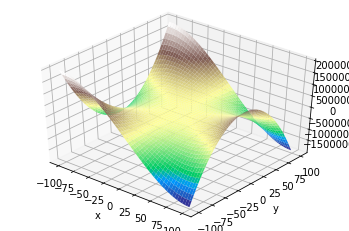

In [13]:
#  plotting our objective function 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-100, 100)
y = np.arange(-100, 100)
xgrid, ygrid = np.meshgrid(x, y) #it is to create a rectangular grid out of the values for x and Y
xy = np.stack([xgrid, ygrid]) #will create a new array by joining the sequence of different arrays of same dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, -50)
ax.plot_surface(xgrid, ygrid, monk(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

###  Different techniques to deal with NCO
#### iteration methods are generally used to solve NCO. 
#### All those methods exploits the two basic information of the function 
     1. Slope :- first order derivative
     2. Curvature :- second order derivatives
#### Gradient descent and its variation uses first order derviatives to find local minima. Sometimes got trap in saddle point if not intialized properly. 
#### Newtons methods and its variants uses both second order and first order derivative to find local minima, can escape from saddle point, but computationally expensive.



#### Visualization of loss function and optimizer

In [ ]:
!pip install ffmpeg-python

In [14]:
from autograd import elementwise_grad, value_and_grad
from collections import defaultdict
from itertools import zip_longest
from functools import partial
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML


f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
func = value_and_grad(lambda args: f(*args))
x0 = np.array([3., 4.])
res = so.minimize(func, x0, method='Newton-CG', jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [15]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [16]:
path_ = [x0]
res = so.minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
dict(res)
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

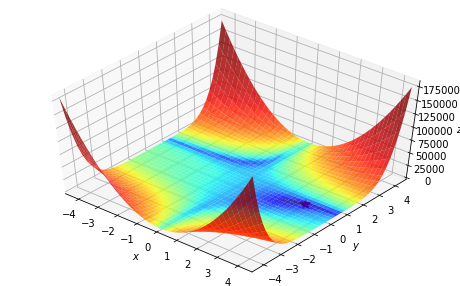

In [17]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
minima = np.array([3., .5])
f(*minima)
minima_ = minima.reshape(-1, 1)
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [18]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [19]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [20]:
line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'bo')
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [21]:
HTML(anim.to_html5_video())


### Example of NCO 
#### A simple bilinear program 
[Installation blog](https://support.gurobi.com/hc/en-us/articles/360044290292-How-do-I-install-Gurobi-for-Python-) for gurobi.
#### After installing gurobi 
[register](https://www.gurobi.com/free-trial/) here for the license. They provide for both acadmeic and non-acadmeic use.
After registering you will get a license key. Installed it in the default path. 


#### Maximize : $x$
#### s.t :

$x+y+z\leq10$

$x*y\leq 2$

$x*y+y*z=1$

    x, y, z non-negative (x integral in second version)

In [2]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("bilinear")

Using license file C:\Users\This_PC\gurobi.lic
Academic license - for non-commercial use only


In [3]:
# Create variables
x = m.addVar(name="x")
y = m.addVar(name="y")
z = m.addVar(name="z")

# Set objective: maximize x
m.setObjective(1.0*x, GRB.MAXIMIZE)

# Add linear constraint: x + y + z <= 10
m.addConstr(x + y + z <= 10, "c0")

# Add bilinear inequality constraint: x * y <= 2
m.addConstr(x*y <= 2, "bilinear0")

# Add bilinear equality constraint: x * z + y * z == 1
m.addConstr(x*z + y*z == 1, "bilinear1")

# First optimize() call will fail - need to set NonConvex to 2
try:
    m.optimize()
except gp.GurobiError:
    print("Optimize failed due to non-convexity")

# Solve bilinear model
m.params.NonConvex = 2
m.optimize()

m.printAttr('x')

# Constrain 'x' to be integral and solve again
x.vType = GRB.INTEGER
m.optimize()

m.printAttr('x')


Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x13e23f04
Model has 2 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
  QRHS range       [1e+00, 2e+00]
Optimize failed due to non-convexity
Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x13e23f04
Model has 2 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
  QRHS range       [1e+00, 2e+00]

Continuous model is non-convex -- solving as a MIP.

Presolve time: 0.02s
